In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import scipy

In [ ]:
# load the dataset using pandas
data = pd.read_csv('/content/creditcard.csv')

In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
68999,53221,-1.806023,0.744146,0.232503,0.165389,-0.263900,-0.738677,-0.122890,0.921002,-0.813040,...,-0.157214,-0.694061,0.372285,-0.056843,-0.050488,0.078364,-0.004787,-0.317056,15.98,0.0
24292,33160,-2.962486,-2.392603,1.323830,-1.385686,-1.211842,0.252873,1.700747,-0.900341,-0.599895,...,-0.174141,0.978500,-0.013004,0.082363,0.603034,-0.223476,-0.468071,0.135226,479.10,0.0
43153,41394,-1.851824,0.602179,0.739416,-1.080824,0.551174,-1.074402,0.744156,0.142937,-0.458011,...,-0.494244,-1.096640,0.472767,-0.017444,-0.030697,0.494367,0.006547,-0.132837,16.94,0.0
12225,21371,-8.299381,4.823558,-6.317569,1.613919,-5.226017,-1.855611,-3.002336,5.108807,0.939310,...,0.088550,-0.202298,-0.212721,0.701478,-0.097644,-0.444046,0.142450,-0.051912,89.99,0.0
78819,57721,-0.555745,0.167416,1.512980,-1.957175,-0.108346,-0.509201,1.230478,-0.663926,-1.123030,...,-0.258172,-0.590147,0.025264,0.034238,-0.488473,-0.899801,-0.443848,-0.328305,98.00,0.0


In [ ]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12090 entries, 68999 to 5657
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    12090 non-null  int64  
 1   V1      12090 non-null  float64
 2   V2      12090 non-null  float64
 3   V3      12090 non-null  float64
 4   V4      12090 non-null  float64
 5   V5      12090 non-null  float64
 6   V6      12090 non-null  float64
 7   V7      12090 non-null  float64
 8   V8      12090 non-null  float64
 9   V9      12090 non-null  float64
 10  V10     12090 non-null  float64
 11  V11     12090 non-null  float64
 12  V12     12090 non-null  float64
 13  V13     12090 non-null  float64
 14  V14     12090 non-null  float64
 15  V15     12090 non-null  float64
 16  V16     12090 non-null  float64
 17  V17     12090 non-null  float64
 18  V18     12090 non-null  float64
 19  V19     12090 non-null  float64
 20  V20     12090 non-null  float64
 21  V21     12090 non-null  float64


In [ ]:
data.describe().T.head()

,count,mean,std,min,25%,50%,75%,max
Time,12090.0,47282.848056,19213.156170,0.000000,35270.000000,49057.000000,63044.250000,75998.000000
V1,12090.0,-0.273651,1.888428,-28.344757,-1.026938,-0.263728,1.153836,1.656708
V2,12090.0,-0.007915,1.701734,-40.978852,-0.596270,0.100289,0.759965,15.598193
V3,12090.0,0.661535,1.344187,-28.923756,0.170787,0.752018,1.366088,4.079168
V4,12090.0,0.159467,1.337008,-4.759357,-0.710333,0.189520,1.022912,11.927512


In [ ]:
data.shape

(12090, 31)

In [ ]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
fraud_cases=len(data[data['Class']==1])

In [ ]:
print(' Number of Fraud Cases:',fraud_cases)

 Number of Fraud Cases: 20


In [ ]:
non_fraud_cases=len(data[data['Class']==0])


In [ ]:
print('Number of Non Fraud Cases:',non_fraud_cases)

Number of Non Fraud Cases: 12070


In [ ]:
fraud=data[data['Class']==1]

In [ ]:
genuine=data[data['Class']==0]

In [ ]:
fraud.Amount.describe()

count     20.000000
mean      78.354000
std      117.541423
min        0.760000
25%        1.000000
50%       17.035000
75%       99.990000
max      444.170000
Name: Amount, dtype: float64

In [ ]:
genuine.Amount.describe()

count    12070.000000
mean        93.885989
std        235.068028
min          0.000000
25%          6.502500
50%         25.000000
75%         85.667500
max       6950.510000
Name: Amount, dtype: float64

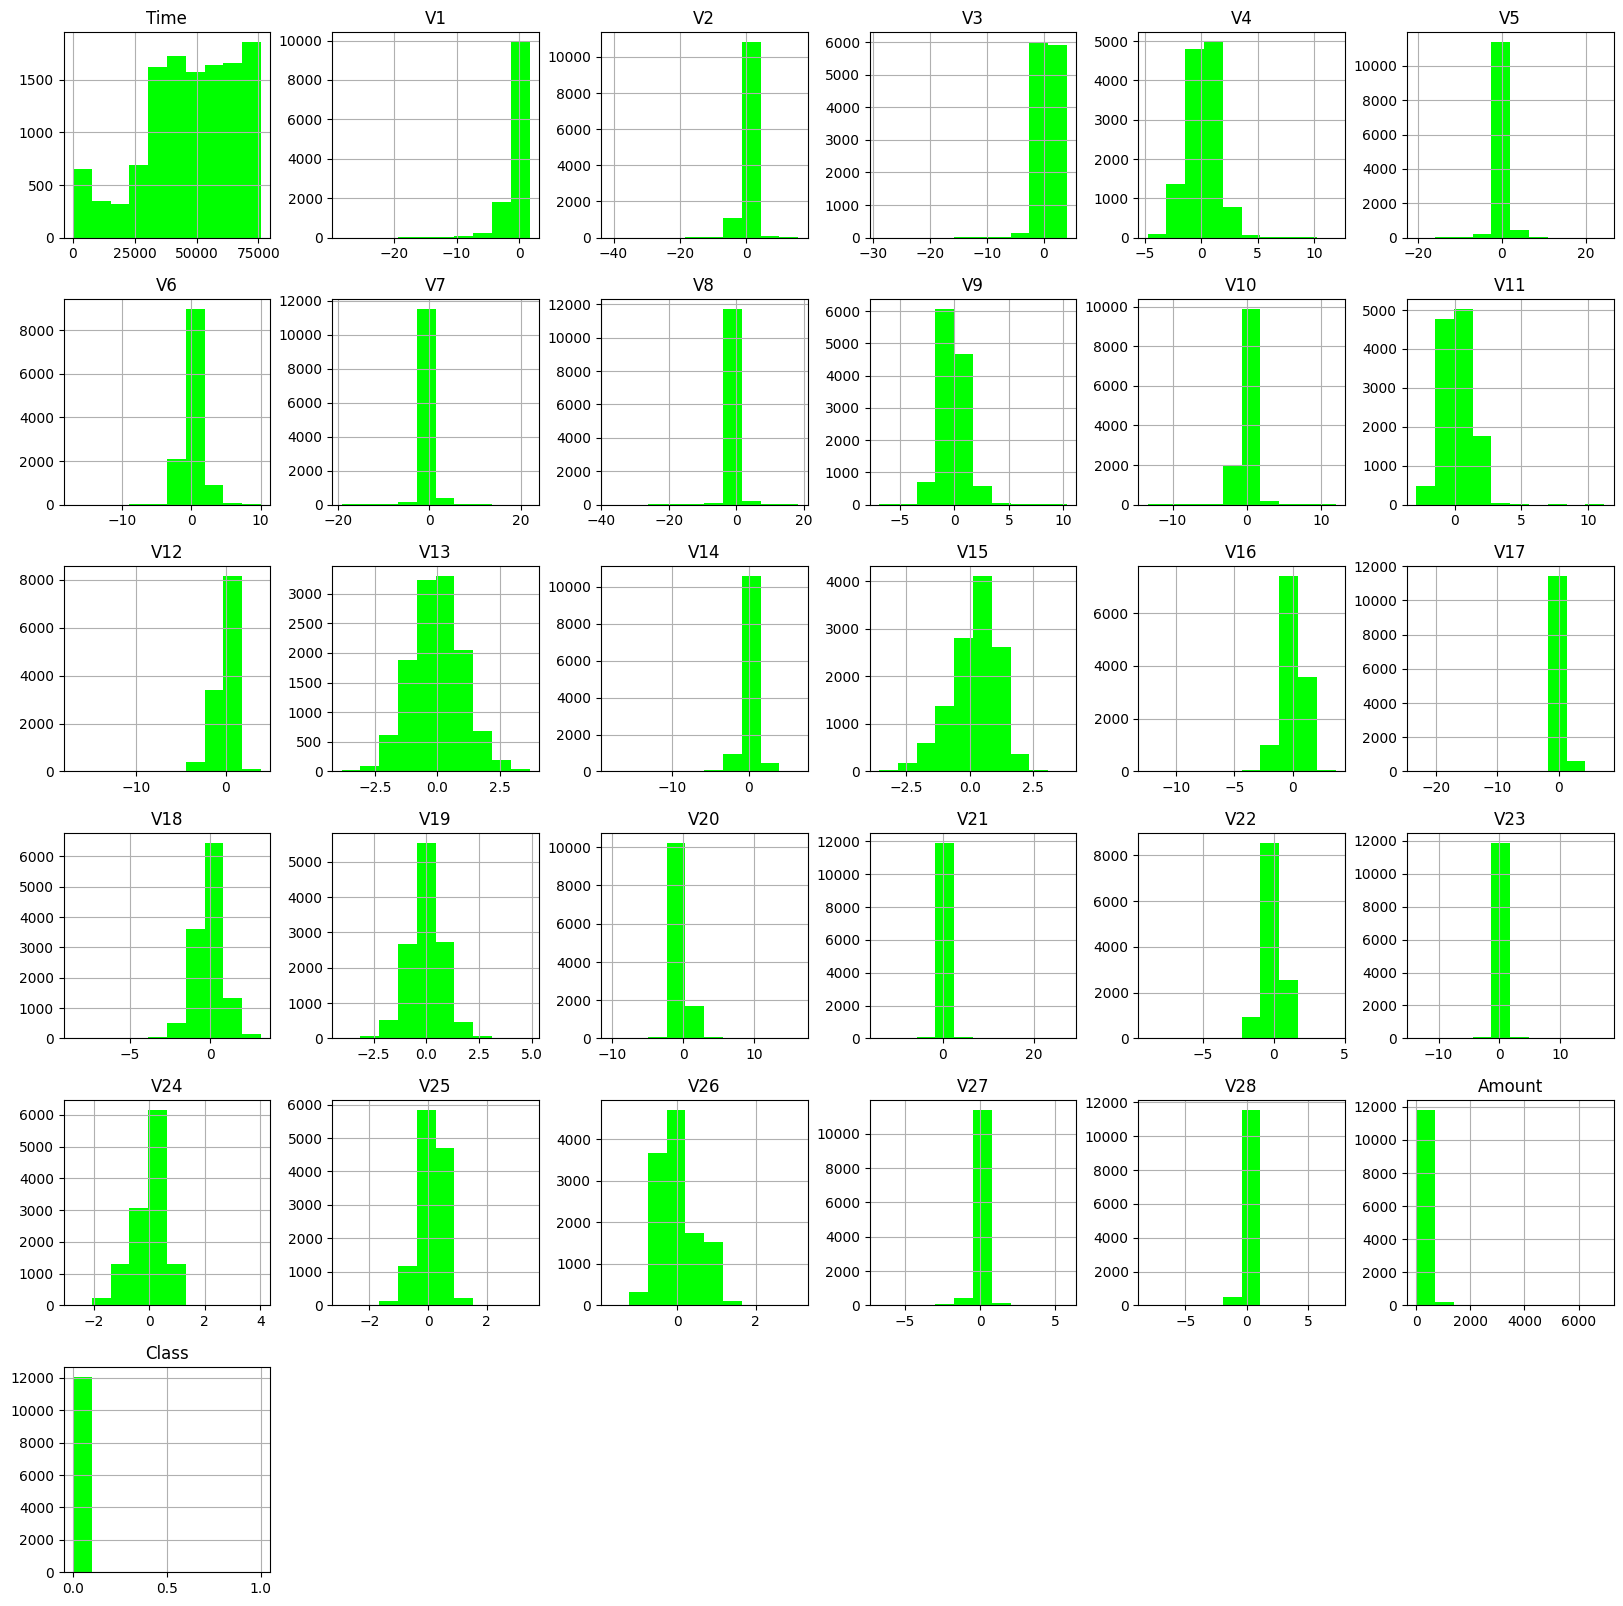

In [ ]:
data.hist(figsize=(20,20),color='lime')
plt.show()

<Axes: >

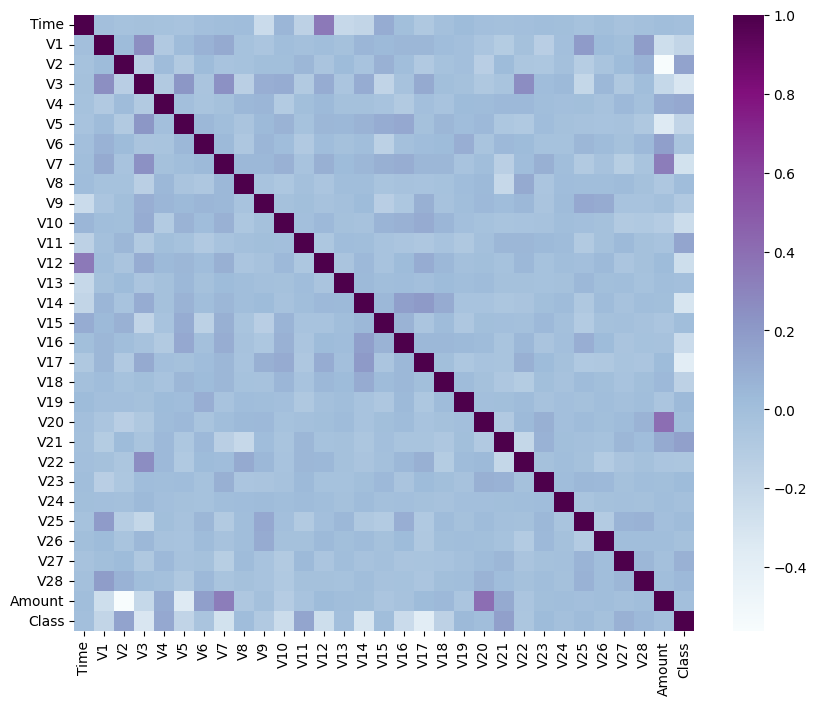

In [ ]:
plt.figure(figsize=(10,8))
corr=data.corr()
sns.heatmap(corr,cmap='BuPu')

In [ ]:
from sklearn.model_selection import train_test_split

#model 1

In [ ]:
X=data.drop(['Class'],axis=1)

In [ ]:
y=data['Class']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=123)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc=RandomForestClassifier()

In [ ]:
model=rfc.fit(X_train,y_train)

In [ ]:
prediction=model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,prediction)

0.9988971601874828

#model 2

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
X1=data.drop(['Class'],axis=1)

In [ ]:
y1=data['Class']

In [ ]:
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,test_size=0.3,random_state=123)

In [ ]:
lr=LogisticRegression()

In [ ]:
model2=lr.fit(X1_train,y1_train)

In [ ]:
prediction2=model2.predict(X1_test)

In [ ]:
accuracy_score(y1_test,prediction2)

0.9980700303280948

#model 3

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
X2=data.drop(['Class'],axis=1)

In [ ]:
y2=data['Class']

In [ ]:
dt=DecisionTreeRegressor()

In [ ]:
X2_train,X2_test,y2_train,y2_test=train_test_split(X2,y2,test_size=0.3,random_state=123)

In [ ]:
model3=dt.fit(X2_train,y2_train)

In [ ]:
prediction3=model3.predict(X2_test)

In [ ]:
accuracy_score(y2_test,prediction3)

0.9986214502343534